In [ ]:
student_id =  401210989
student_name = "Yashar Moradi"

print("your student id:", student_id)
print("your name:", student_name)

your student id: 401210989
your name: Yashar Moradi


 تمام مدل ها در لینک زیر ذخیره شده و دسترسی آن به ایمیل دستیار تمرین داده شده است.
 https://drive.google.com/drive/folders/1O7xBYsseu1FWjOYu_pibChcHWsztbzS5


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Deep Learning/HW3'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Q1_Classifier.pth', 'Q1_FeatureEx.pth', 'Q1_FeatureEx_Classifier.pth', 'Q1_FeatureExClassifier.pth']


In [9]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Eastern"
time.tzset()

Q1_Classifier_path = os.path.join(GOOGLE_DRIVE_PATH, 'Q1_Classifier.pth')
Q1_Classifier_edit_time = time.ctime(os.path.getmtime(Q1_Classifier_path))
print('Q1_Classifier.pth last edited on %s' % Q1_Classifier_edit_time)

Q1_FeatureEx_path = os.path.join(GOOGLE_DRIVE_PATH, 'Q1_FeatureEx.pth')
Q1_FeatureEx_edit_time = time.ctime(os.path.getmtime(Q1_FeatureEx_path))
print('Q1_FeatureEx.pth last edited on %s' % Q1_FeatureEx_edit_time)

Q1_FeatureEx_Classifier_path = os.path.join(GOOGLE_DRIVE_PATH, 'Q1_FeatureEx_Classifier.pth')
Q1_FeatureEx_Classifier_edit_time = time.ctime(os.path.getmtime(Q1_FeatureEx_Classifier_path))
print('Q1_FeatureEx_Classifier.pth last edited on %s' % Q1_FeatureEx_Classifier_edit_time)

Q1_FeatureExClassifier_path = os.path.join(GOOGLE_DRIVE_PATH, 'Q1_FeatureExClassifier.pth')
Q1_FeatureExClassifier_edit_time = time.ctime(os.path.getmtime(Q1_FeatureExClassifier_path))
print('Q1_FeatureExClassifier.pth last edited on %s' % Q1_FeatureExClassifier_edit_time)

Q1_Classifier.pth last edited on Wed Dec 20 14:20:35 2023
Q1_FeatureEx.pth last edited on Wed Dec 20 14:56:43 2023
Q1_FeatureEx_Classifier.pth last edited on Wed Dec 20 15:05:30 2023
Q1_FeatureExClassifier.pth last edited on Wed Dec 20 15:39:54 2023


In [15]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torchvision import models

In [16]:
print("Torch version:",torch.__version__)

print("Is CUDA enabled?",torch.cuda.is_available())

if torch.cuda.is_available():
 dev = "cuda:0"
else:
 dev = "cpu"

device = torch.device(dev)

Torch version: 2.1.0+cu121
Is CUDA enabled? True


آماده کردن دیتاست سیفار 2 کلاسه اتومبیل و هواپیما

In [17]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                          std=[0.5, 0.5, 0.5])
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

batch_size = 50

train_subset_idx = np.where((np.array(train_dataset.targets) == 0) | (np.array(train_dataset.targets) == 1))[0]
test_subset_idx  = np.where((np.array(test_dataset.targets) == 0) | (np.array(test_dataset.targets) == 1))[0]

train_dataset = torch.utils.data.Subset(train_dataset, train_subset_idx)
test_dataset  = torch.utils.data.Subset(test_dataset, test_subset_idx)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, num_workers=0, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


مدل انتخاب شده رزنت 50

In [ ]:
model = torchvision.models.resnet50(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 149MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

جایگزین کردن لایه آخر با یک طبقه بند 2 کلاسه

In [18]:
num_classes = 2
num_epochs = 10
learning_rate = 0.01

model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(2048, num_classes)

model.to(device)

for param in model.parameters():
    param.requires_grad = False

model.fc.weight.requires_grad = True
model.fc.bias.requires_grad = True

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
ce_loss = nn.CrossEntropyLoss()

آموزش شبکه

In [ ]:
model.train()
train_loss = []
train_acc = []
for epoch in range(num_epochs):
    batch_loss = 0.0
    batch_corrects = 0
    for data in train_loader:

        x_train, y_train = data
        x_train, y_train = x_train.to(device), y_train.to(device)

        optimizer.zero_grad()

        outputs = model(x_train)

        loss = ce_loss(outputs, y_train)
        loss.backward()
        optimizer.step()

        _, y_preds = torch.max(outputs, 1)
        batch_loss += loss.item()
        batch_corrects += torch.sum(y_preds == y_train.data).item()

    epoch_loss = batch_loss / len(train_loader)
    epoch_acc = batch_corrects / len(train_loader.dataset)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    print('Epoch {}/{} - Training loss: {:.4f} - Training accuracy: {:.4f}'.format(epoch+1, num_epochs, epoch_loss, epoch_acc))

torch.save(model.state_dict(), "Q1_Classifier.pth")

Epoch 1/10 - Training loss: 0.4058 - Training accuracy: 0.8959
Epoch 2/10 - Training loss: 0.1844 - Training accuracy: 0.9414
Epoch 3/10 - Training loss: 0.1939 - Training accuracy: 0.9415
Epoch 4/10 - Training loss: 0.2241 - Training accuracy: 0.9402
Epoch 5/10 - Training loss: 0.2458 - Training accuracy: 0.9407
Epoch 6/10 - Training loss: 0.2799 - Training accuracy: 0.9393
Epoch 7/10 - Training loss: 0.2415 - Training accuracy: 0.9474
Epoch 8/10 - Training loss: 0.1740 - Training accuracy: 0.9573
Epoch 9/10 - Training loss: 0.1965 - Training accuracy: 0.9529
Epoch 10/10 - Training loss: 0.1986 - Training accuracy: 0.9517


نمودار های دقت و خطای قسمت اول

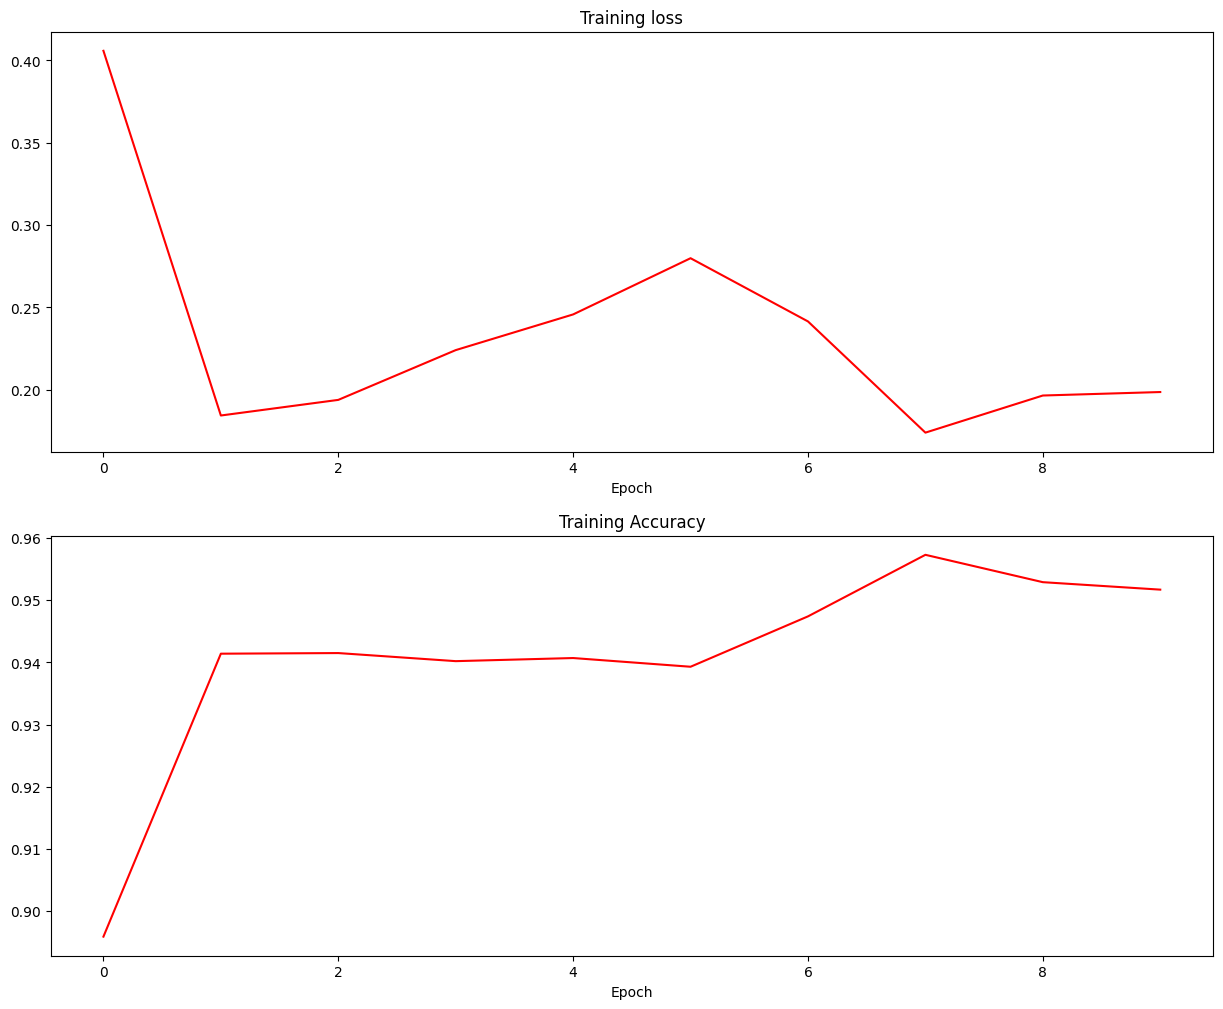

In [ ]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(train_loss, 'r')
plt.xlabel('Epoch')

plt.subplot(2, 1, 2)
plt.title('Training Accuracy')
plt.plot(train_acc, 'r')
plt.xlabel('Epoch')
plt.gcf().set_size_inches(15, 12)
plt.show()

بارگذاری مدل آموزش داده که در درایو ذخیره شده است. برای انجام تست

In [19]:
num_classes = 2
model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(2048, num_classes)
model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/Deep Learning/HW3/Q1_Classifier.pth'))

<All keys matched successfully>

دقت و خطای تست در مدل قسمت اول

In [21]:
model.eval()
batch_loss = 0.0
batch_corrects = 0
for data in test_loader:

    x_test, y_test = data
    x_test, y_test = x_test.to(device), y_test.to(device)

    outputs = model(x_test)

    loss = ce_loss(outputs, y_test)

    _, y_preds = torch.max(outputs, 1)
    batch_loss += loss.item()
    batch_corrects += torch.sum(y_preds == y_test.data).item()

epoch_loss = batch_loss / len(test_loader.dataset)
epoch_acc = batch_corrects / len(test_loader.dataset)
print('Test loss: {:.4f} - Test accuracy: {:.4f}'.format(epoch_loss, epoch_acc))

Test loss: 0.0080 - Test accuracy: 0.9215


کلاس دیتاست و کلاس خطا برای قسمت دوم

In [22]:
class TripletDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __getitem__(self, idx):
        x, y = self.data[idx]

        pos_idx = torch.randint(high=len(self.data), size=(1,)).item()
        while self.data[pos_idx][1] != y:
            pos_idx = torch.randint(high=len(self.data), size=(1,)).item()
        x_pos, _ = self.data[pos_idx]

        neg_idx = torch.randint(high=len(self.data), size=(1,)).item()
        while self.data[neg_idx][1] == y:
            neg_idx = torch.randint(high=len(self.data), size=(1,)).item()
        x_neg, _ = self.data[neg_idx]

        return x, x_pos, x_neg, y

    def __len__(self):
        return len(self.data)

class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, x, x_pos, x_neg):
        d_pos = torch.norm(x - x_pos, dim=1)
        d_neg = torch.norm(x - x_neg, dim=1)
        losses = torch.relu(d_pos - d_neg + self.margin)
        return losses.mean()

آماده کردن دیتاست برای قسمت دوم و جایگزینی لایه آخر شبکه با یک استخراج گر ویژگی که 100 ویژگی را استخراج می کند

In [23]:
triplet_dataset = TripletDataset(train_dataset)
triplet_loader = DataLoader(dataset=triplet_dataset, batch_size=batch_size, num_workers=0, shuffle=True)

num_feature = 100
num_epochs = 10
learning_rate = 0.01

model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(2048 , num_feature)

model.to(device)

for param in model.parameters():
    param.requires_grad = False

model.fc.weight.requires_grad = True
model.fc.bias.requires_grad = True

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
triplet_loss = TripletLoss()

آموزش شبکه استخراج گر ویژگی برای قسمت دوم

In [ ]:
model.train()
train_loss = []
for epoch in range(num_epochs):
    batch_loss = 0.0
    for data in triplet_loader:

        x_train, x_train_pos, x_train_neg, y_train = data
        x_train = x_train.to(device)
        x_train_pos = x_train_pos.to(device)
        x_train_neg = x_train_neg.to(device)

        optimizer.zero_grad()

        output = model(x_train)
        output_pos = model(x_train_pos)
        output_neg = model(x_train_neg)

        loss = triplet_loss(output, output_pos, output_neg)
        loss.backward()
        optimizer.step()

        batch_loss += loss.item()

    epoch_loss = batch_loss / len(train_loader)
    train_loss.append(epoch_loss)
    print('Epoch {}/{} - Training loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

torch.save(model.state_dict(), "Q1_FeatureEx.pth")

Epoch 1/10 - Training loss: 1.3272
Epoch 2/10 - Training loss: 1.3563
Epoch 3/10 - Training loss: 1.5336
Epoch 4/10 - Training loss: 1.3929
Epoch 5/10 - Training loss: 1.3678
Epoch 6/10 - Training loss: 1.3787
Epoch 7/10 - Training loss: 1.4333
Epoch 8/10 - Training loss: 1.4450
Epoch 9/10 - Training loss: 1.3799
Epoch 10/10 - Training loss: 1.3562


نمودار خطا برای ایپاک های مختلف قسمت دوم

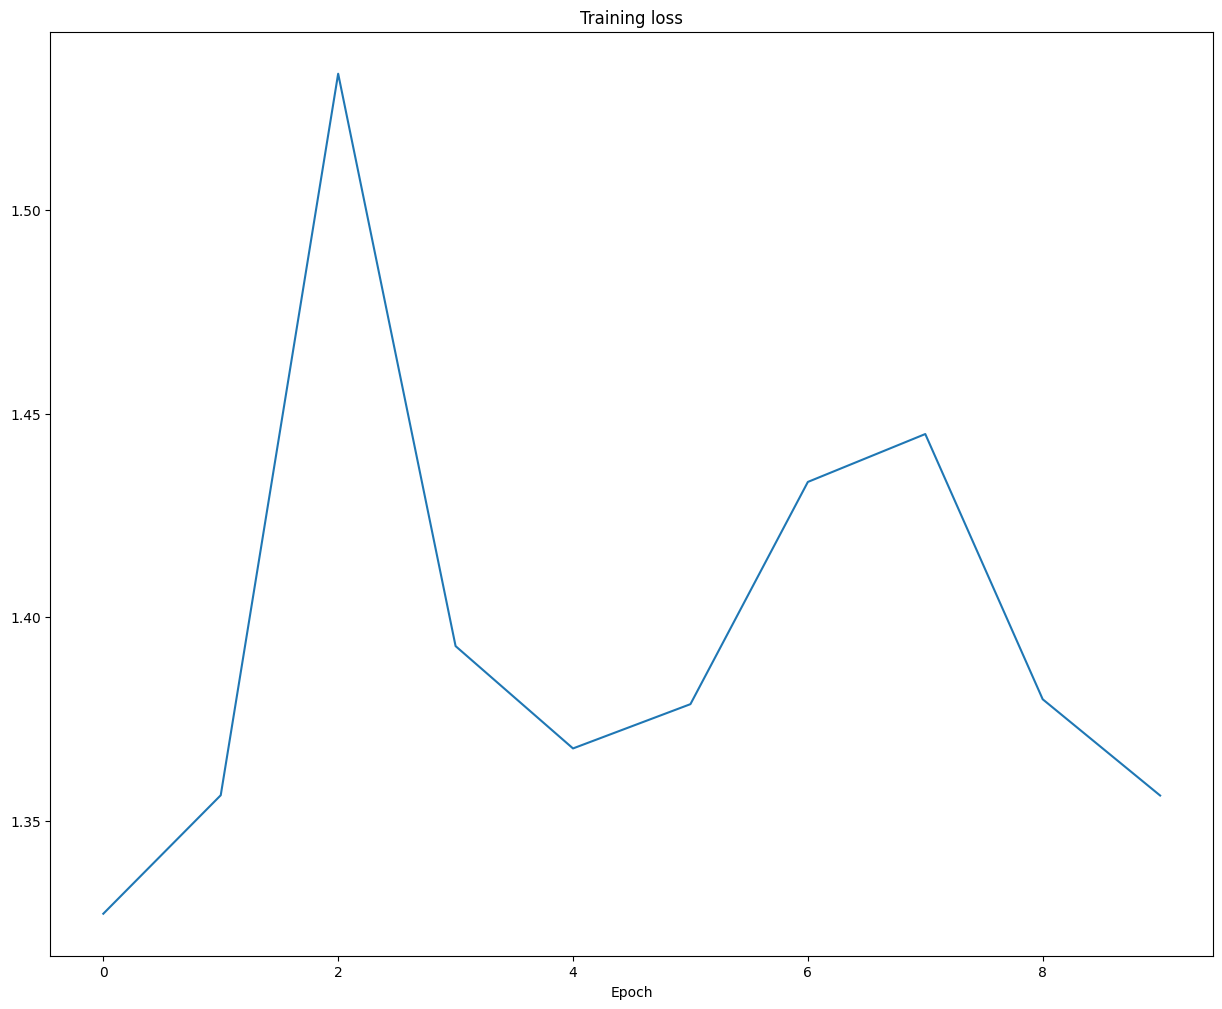

In [ ]:
plt.subplot(1, 1, 1)
plt.title('Training loss')
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.gcf().set_size_inches(15, 12)
plt.show()

اضافه کردن یک طبقه بند به آخر شبکه قسمت دوم

In [24]:
num_feature = 100
num_classes = 2
num_epochs = 10
learning_rate = 0.01

model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(2048 , num_feature)
model.load_state_dict(torch.load('/content/drive/MyDrive/Deep Learning/HW3/Q1_FeatureEx.pth'))
weight = model.fc.weight
bias = model.fc.bias

model.fc = nn.Sequential(nn.Linear(2048, num_feature),
                         nn.ReLU(),
                         nn.Linear(num_feature, num_classes))

model.fc[0].weight = weight
model.fc[0].bias = bias

for param in model.parameters():
    param.requires_grad = False

model.to(device)

model.fc[2].weight.requires_grad = True
model.fc[2].bias.requires_grad = True

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
ce_loss = nn.CrossEntropyLoss()

آموزش شبکه بعد از اضافه شدن طبقه بند قسمت دوم

In [ ]:
model.train()
train_loss = []
train_acc = []
for epoch in range(num_epochs):
    batch_loss = 0.0
    batch_corrects = 0
    for data in train_loader:

        x_train, y_train = data
        x_train, y_train = x_train.to(device), y_train.to(device)

        optimizer.zero_grad()

        outputs = model(x_train)

        loss = ce_loss(outputs, y_train)
        loss.backward()
        optimizer.step()

        _, y_preds = torch.max(outputs, 1)
        batch_loss += loss.item()
        batch_corrects += torch.sum(y_preds == y_train.data).item()

    epoch_loss = batch_loss / len(train_loader)
    epoch_acc = batch_corrects / len(train_loader.dataset)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    print('Epoch {}/{} - Training loss: {:.4f} - Training accuracy: {:.4f}'.format(epoch+1, num_epochs, epoch_loss, epoch_acc))

torch.save(model.state_dict(), "Q1_FeatureEx_Classifier.pth")

Epoch 1/10 - Training loss: 0.2084 - Training accuracy: 0.9569
Epoch 2/10 - Training loss: 0.1365 - Training accuracy: 0.9637
Epoch 3/10 - Training loss: 0.1280 - Training accuracy: 0.9641
Epoch 4/10 - Training loss: 0.2088 - Training accuracy: 0.9593
Epoch 5/10 - Training loss: 0.1853 - Training accuracy: 0.9623
Epoch 6/10 - Training loss: 0.1406 - Training accuracy: 0.9645
Epoch 7/10 - Training loss: 0.2254 - Training accuracy: 0.9609
Epoch 8/10 - Training loss: 0.1954 - Training accuracy: 0.9618
Epoch 9/10 - Training loss: 0.1275 - Training accuracy: 0.9672
Epoch 10/10 - Training loss: 0.1873 - Training accuracy: 0.9614


نمودار های خطا و دقت برای شبکه قسمت دوم

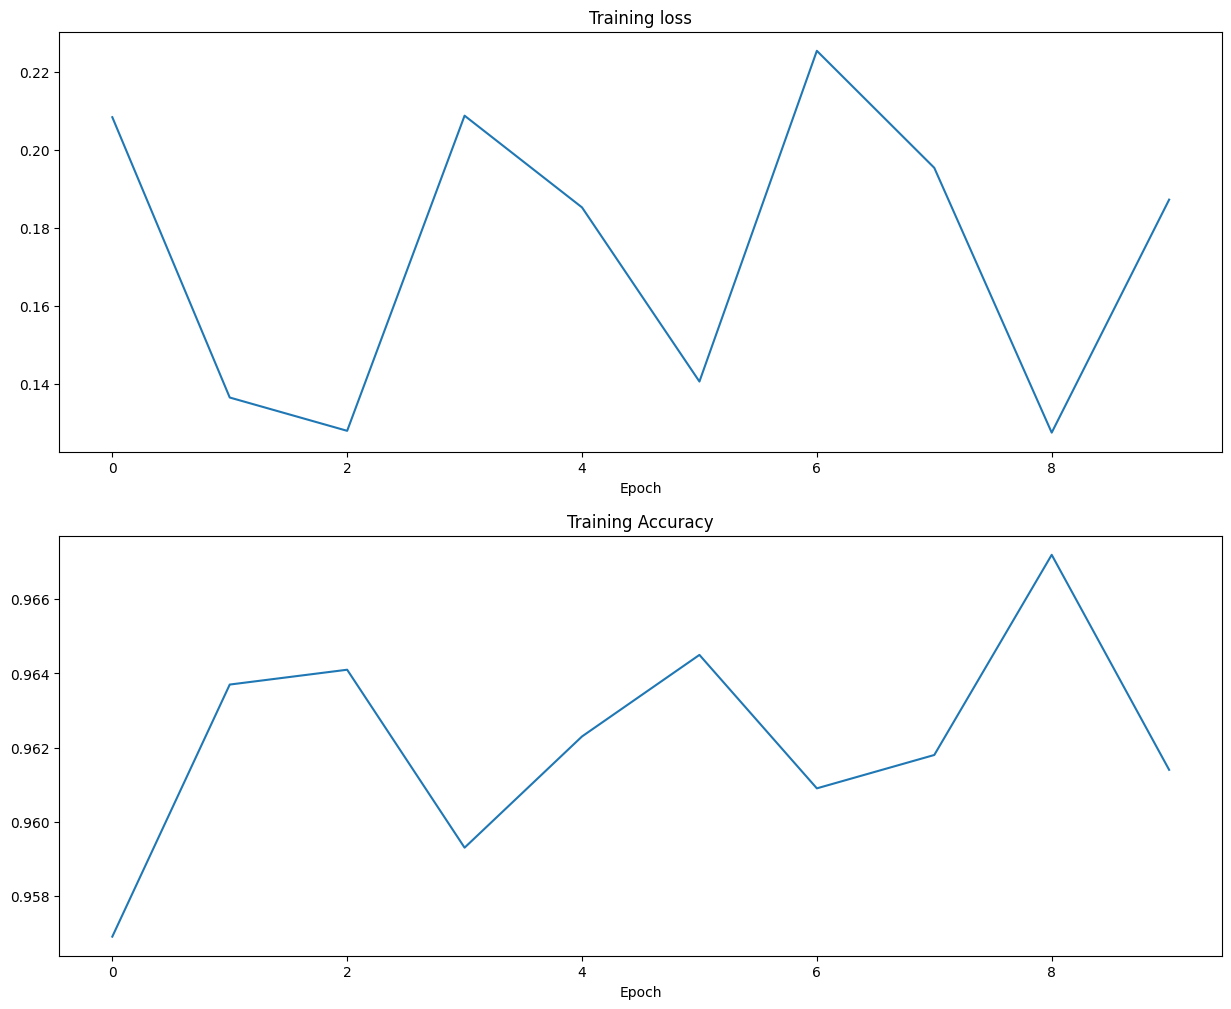

In [ ]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(train_loss)
plt.xlabel('Epoch')

plt.subplot(2, 1, 2)
plt.title('Training Accuracy')
plt.plot(train_acc)
plt.xlabel('Epoch')
plt.gcf().set_size_inches(15, 12)
plt.show()

بارگذاری شبکه ذخیره شده در درایو برای تست قسمت دوم

In [25]:
num_feature = 100
num_classes = 2
model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Sequential(nn.Linear(2048, num_feature),
                         nn.ReLU(),
                         nn.Linear(num_feature, num_classes))
model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/Deep Learning/HW3/Q1_FeatureEx_Classifier.pth'))

<All keys matched successfully>

تست شبکه قسمت دوم

In [26]:
model.eval()
batch_loss = 0.0
batch_corrects = 0
for data in test_loader:

    x_test, y_test = data
    x_test, y_test = x_test.to(device), y_test.to(device)

    outputs = model(x_test)

    loss = ce_loss(outputs, y_test)

    _, y_preds = torch.max(outputs, 1)
    batch_loss += loss.item()
    batch_corrects += torch.sum(y_preds == y_test.data).item()

epoch_loss = batch_loss / len(test_loader.dataset)
epoch_acc = batch_corrects / len(test_loader.dataset)
print('Test loss: {:.4f} - Test accuracy: {:.4f}'.format(epoch_loss, epoch_acc))

Test loss: 0.0062 - Test accuracy: 0.9490


جایگزینی لایه آخر شبکه با دو لایه استخراج گر ویژگی و طبقه بند قسمت سوم

In [27]:
num_feature = 100
num_classes = 2
num_epochs = 10
learning_rate = 0.01

model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Sequential(nn.Linear(2048, num_feature),
                         nn.ReLU(),
                         nn.Linear(num_feature, num_classes))

model.to(device)

for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
ce_loss = nn.CrossEntropyLoss()
triplet_loss = TripletLoss()

آموزش همزمان کل شبکه قسمت سوم

In [ ]:
model.train()
train_loss = []
train_acc = []
for epoch in range(num_epochs):
    batch_loss = 0.0
    batch_corrects = 0
    for  data in triplet_loader:

        x_train, x_train_pos, x_train_neg, y_train = data
        x_train = x_train.to(device)
        x_train_pos = x_train_pos.to(device)
        x_train_neg = x_train_neg.to(device)
        y_train = y_train.to(device)

        optimizer.zero_grad()

        output = model(x_train)
        output_pos = model(x_train_pos)
        output_neg = model(x_train_neg)

        tr_loss = triplet_loss(output, output_pos, output_neg)
        centropy_loss = ce_loss(output, y_train)
        loss = tr_loss + centropy_loss

        loss.backward()
        optimizer.step()

        _, y_preds = torch.max(output, 1)
        batch_loss += loss.item()
        batch_corrects += torch.sum(y_preds == y_train.data).item()

    epoch_loss = batch_loss / len(train_loader)
    epoch_acc = batch_corrects / len(train_loader.dataset)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    print('Epoch {}/{} - Training loss: {:.4f} - Training accuracy: {:.4f}'.format(epoch+1, num_epochs, epoch_loss, epoch_acc))

torch.save(model.state_dict(), "Q1_FeatureExClassifier.pth")

Epoch 1/10 - Training loss: 0.6209 - Training accuracy: 0.9030
Epoch 2/10 - Training loss: 0.3112 - Training accuracy: 0.9424
Epoch 3/10 - Training loss: 0.2798 - Training accuracy: 0.9550
Epoch 4/10 - Training loss: 0.2675 - Training accuracy: 0.9561
Epoch 5/10 - Training loss: 0.2704 - Training accuracy: 0.9601
Epoch 6/10 - Training loss: 0.2861 - Training accuracy: 0.9519
Epoch 7/10 - Training loss: 0.2547 - Training accuracy: 0.9609
Epoch 8/10 - Training loss: 0.2617 - Training accuracy: 0.9582
Epoch 9/10 - Training loss: 0.2476 - Training accuracy: 0.9586
Epoch 10/10 - Training loss: 0.2413 - Training accuracy: 0.9602


نمودار دقت و خطا برای شبکه قسمت سوم

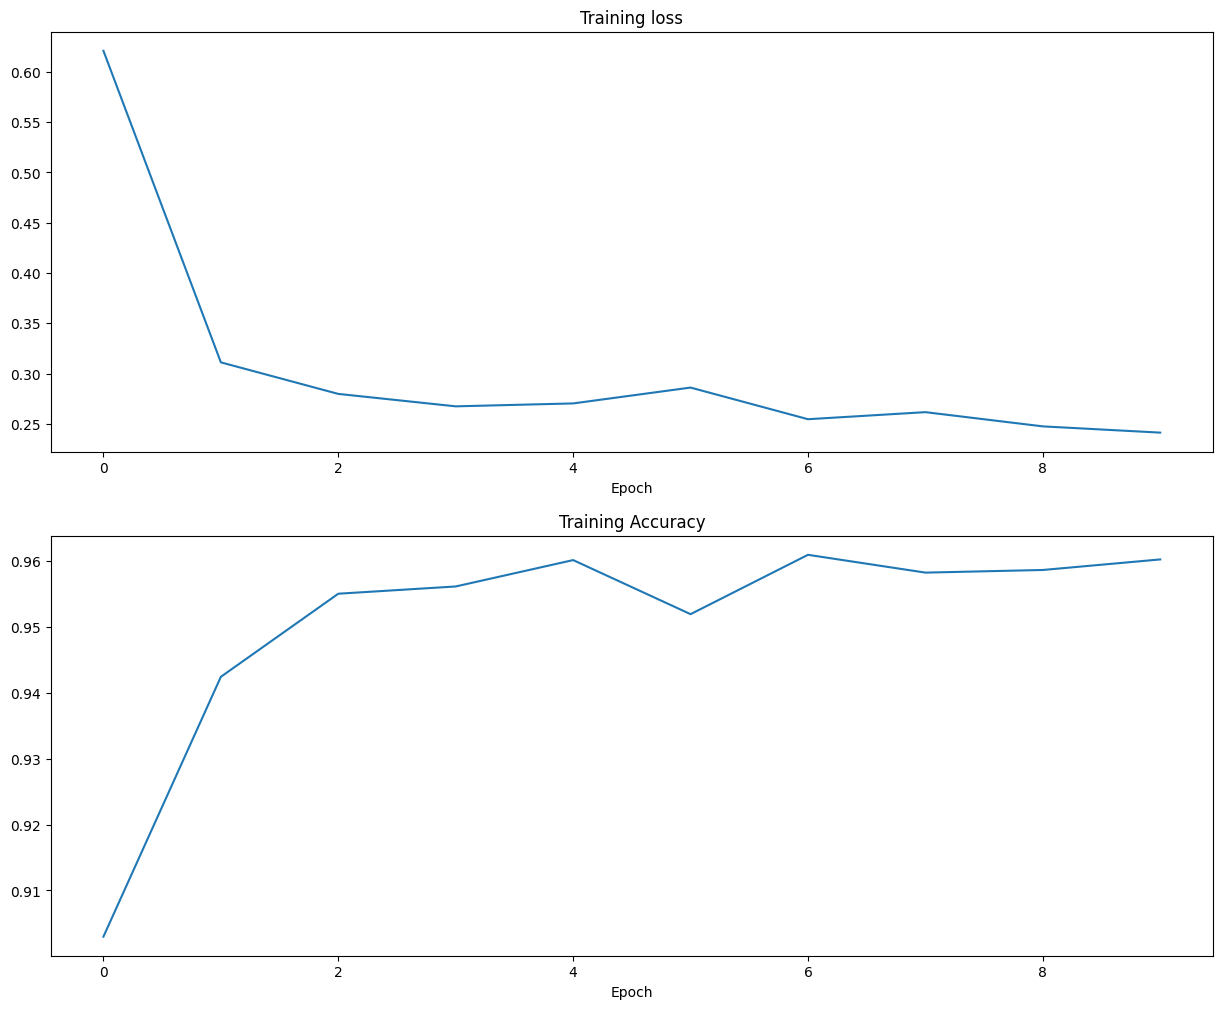

In [ ]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(train_loss)
plt.xlabel('Epoch')

plt.subplot(2, 1, 2)
plt.title('Training Accuracy')
plt.plot(train_acc)
plt.xlabel('Epoch')
plt.gcf().set_size_inches(15, 12)
plt.show()

بارگذاری شبکه آموزش داده قسمت سوم

In [28]:
num_feature = 100
num_classes = 2
model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Sequential(nn.Linear(2048, num_feature),
                         nn.ReLU(),
                         nn.Linear(num_feature, num_classes))
model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/Deep Learning/HW3/Q1_FeatureExClassifier.pth'))

<All keys matched successfully>

تست شبکه قسمت سوم

In [29]:
model.eval()
batch_loss = 0.0
batch_corrects = 0
for data in test_loader:

    x_test, y_test = data
    x_test, y_test = x_test.to(device), y_test.to(device)

    outputs = model(x_test)

    loss = ce_loss(outputs, y_test)

    _, y_preds = torch.max(outputs, 1)
    batch_loss += loss.item()
    batch_corrects += torch.sum(y_preds == y_test.data).item()

epoch_loss = batch_loss / len(test_loader.dataset)
epoch_acc = batch_corrects / len(test_loader.dataset)
print('Test loss: {:.4f} - Test accuracy: {:.4f}'.format(epoch_loss, epoch_acc))

Test loss: 0.0023 - Test accuracy: 0.9565
